# 1. Formula

Description: x is the time interval, and lambda is the inverse of the mean.

Probability Density Function:

$$f(x) = P(X = x) = \lambda e^{-\lambda x} $$

CDF:
$$f(x) = P(X<= x) = 1 - e^{-\lambda x}$$

# 2. Exponential Distribution

In [1]:
from scipy.stats import expon
import seaborn as sb

In [2]:
# The most important parameter is scale, which determines the shape of the Exponential Distribution
# scale = 1/lambda = mean
# loc is the center (start point) of the distribution
random_sample = expon.rvs(loc = 0, scale = 10, size = 1000, random_state = 0)

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Exponential distribution with size = 1000, mu = 10')]

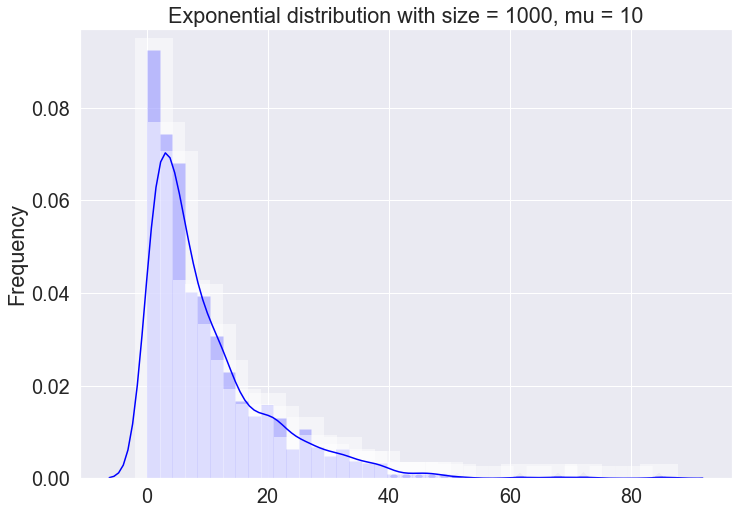

In [3]:
# The shape in a Exponential Distribution is always right skewness 
# Notice: For a Exponential Distribution, there is no upper bound for x-axis
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(random_sample, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Exponential distribution with size = 1000, mu = 10', ylabel = 'Frequency')

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Exponential cumulative distribution')]

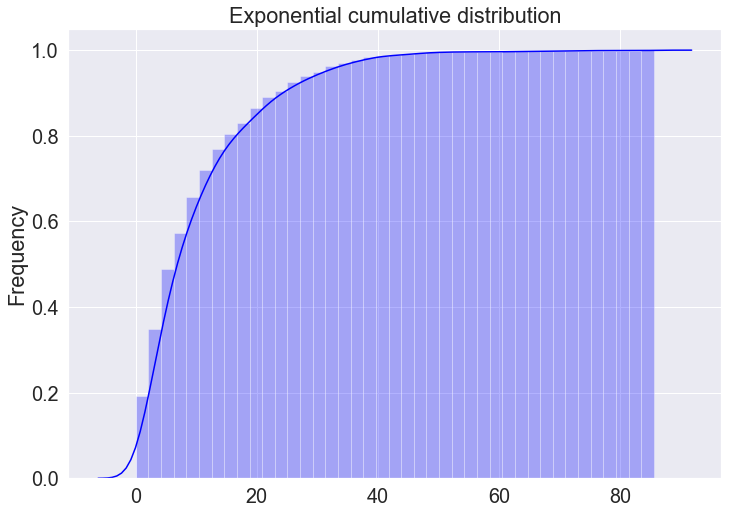

In [4]:
# CDF visualization
sb.set(rc = {'figure.figsize':(11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(random_sample, kde = True, color = 'blue',\
                 hist_kws = dict(cumulative = True, alpha = 0.3),\
                 kde_kws = dict(cumulative = True))
ax.set(title = 'Exponential cumulative distribution', ylabel = 'Frequency')

# 3. Statistics of Exponential Distribution

$$E(X) = \frac {1} {\lambda}$$

In [5]:
# Notice: the scale parameter is itself the mean
expon.mean(loc = 0, scale = 10)

10.0

$$Var(X) = \frac {1} {\lambda^2}$$

$$Std(X) = \sqrt{Var(X)}$$

In [6]:
expon.var(loc = 0, scale = 10)

100.0

In [7]:
expon.std(loc = 0, scale = 10)

10.0

# 4. Example
- **Assume that the length of a phone call in minutes is an exponential random variable X with parameter lambda = 1/10. If someone arrives at a phone booth just before you arrive, find the probability that you will have to wait.**

**(a) Probability of waiting for less than 5 minutes**

$$f(5) = P(X <= 5) = 1 - e^{-1/2}$$

In [8]:
# Can use the pre-built function to solve
less_than_five_mins = expon.cdf(x = 5, loc = 0, scale = 10)
round(less_than_five_mins, 4)

0.3935

In [9]:
# Or, manual calculations
import numpy as np
round(1 - np.exp(-1/2), 4)

0.3935

**(b) Probability of waiting for more than 10 minutes**

$$f(10) = P(X > 10) = 1 - P(X <= 10) = 1 - (1 - e^{-1})$$ 

In [10]:
# Use the pre-built function
more_than_ten_mins = 1 - expon.cdf(x = 10, loc = 0, scale = 10)
round(more_than_ten_mins, 4)

0.3679

In [11]:
# Manual calculations
round(1 - (1 - np.exp(-1)), 4)

0.3679

**(c) Probability of waiting between 5 and 10 minutes**

$$P(5 <= X <= 10) = 1 - [P(X <= 5) + P(X >= 10)] $$ 

In [12]:
# We can use the results from (a) & (b)
between_five_ten_mins = 1 - (less_than_five_mins + more_than_ten_mins)
round(between_five_ten_mins, 4)

0.2387

# 5. Memoryless
- A special attribute in the Exponential Distribution.
- The memoryless proeprty tells us about the conditional behavior of exponential random variables.

$$P(x > s + t | x > s) = P( x > t)$$

# 6. Memoryless - Example
**Given that a person has been waiting in the line for 5 minutes, the probability of waiting for additional 5 minutes is equivalent to the probability of waiting 5 minutes.**

**Proof:** 
$$P(x > 10 | x > 5) = P( x > 5)$$

In [13]:
# Left-hand side of the equation
round(more_than_ten_mins / (1 - less_than_five_mins), 4)

0.6065

In [14]:
# Right-hand side of the equation
round(1 - less_than_five_mins, 4)

0.6065